In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

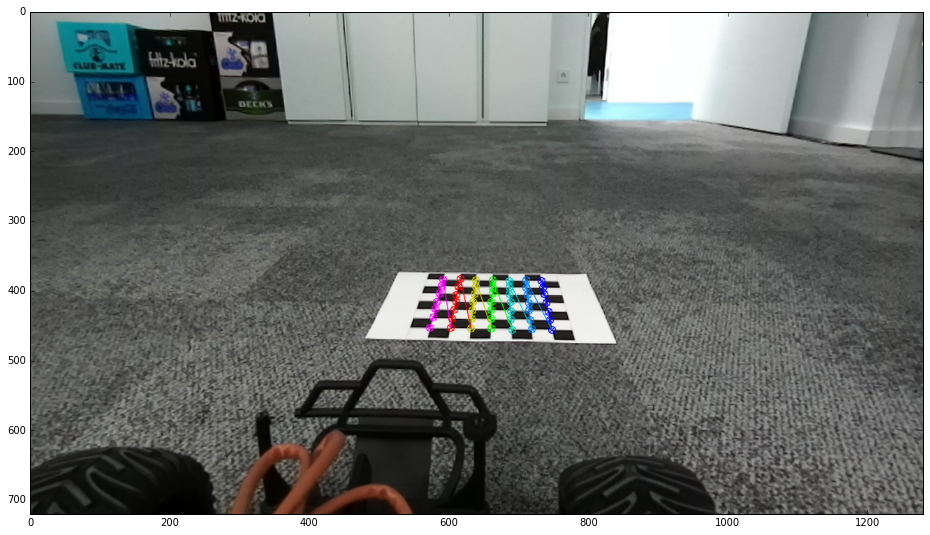

In [37]:
board_img = cv2.imread('chessboard.png')
points_per_row = 7  # number of inner points
points_per_column = 7
found, corners = cv2.findChessboardCorners(board_img, (points_per_row, points_per_column))
cv2.drawChessboardCorners(board_img, (points_per_row, points_per_column), corners, found)
plt.figure(figsize=(18, 9))
_ = plt.imshow(board_img)

In [38]:
img_w, img_h = board_img.shape[1], board_img.shape[0]
dest_board_w = 150
dest_board_h = 150
x_offset = 70
y_offset = 70

obj_points = np.array([
    (img_w/2+dest_board_w/2+x_offset, img_h/2-dest_board_h/2+y_offset), 
    (img_w/2+dest_board_w/2+x_offset, img_h/2+dest_board_h/2+y_offset), 
    (img_w/2-dest_board_w/2+x_offset, img_h/2-dest_board_h/2+y_offset), 
    (img_w/2-dest_board_w/2+x_offset, img_h/2+dest_board_h/2+y_offset)], dtype=np.float32)

img_points = np.array([corners[0], 
                       corners[points_per_column-1], 
                       corners[(points_per_column-1) * points_per_row], 
                       corners[(points_per_column-1) * points_per_row + points_per_column-1]]).squeeze()

In [39]:
t = cv2.getPerspectiveTransform(img_points, obj_points)

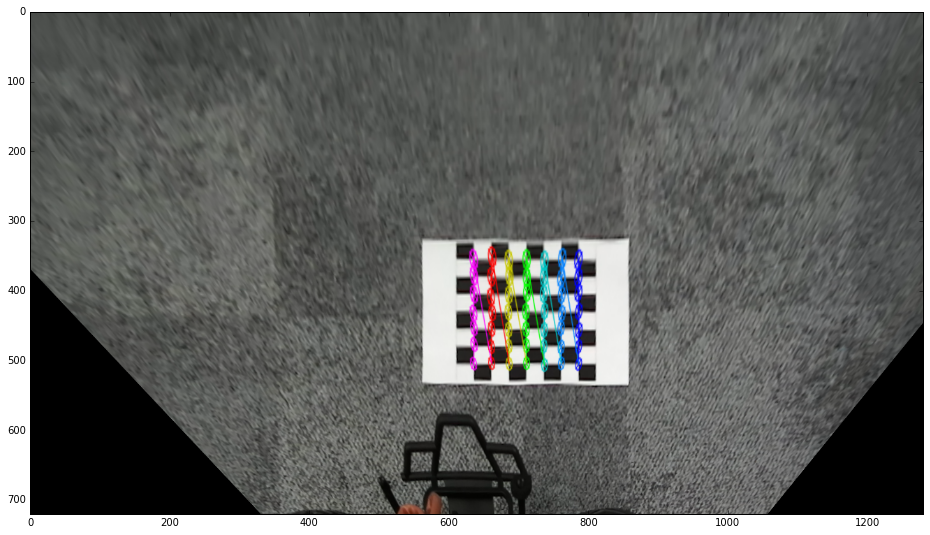

In [40]:
plt.figure(figsize=(18, 9))
_ = plt.imshow(cv2.warpPerspective(board_img, t, (img_w, img_h)))

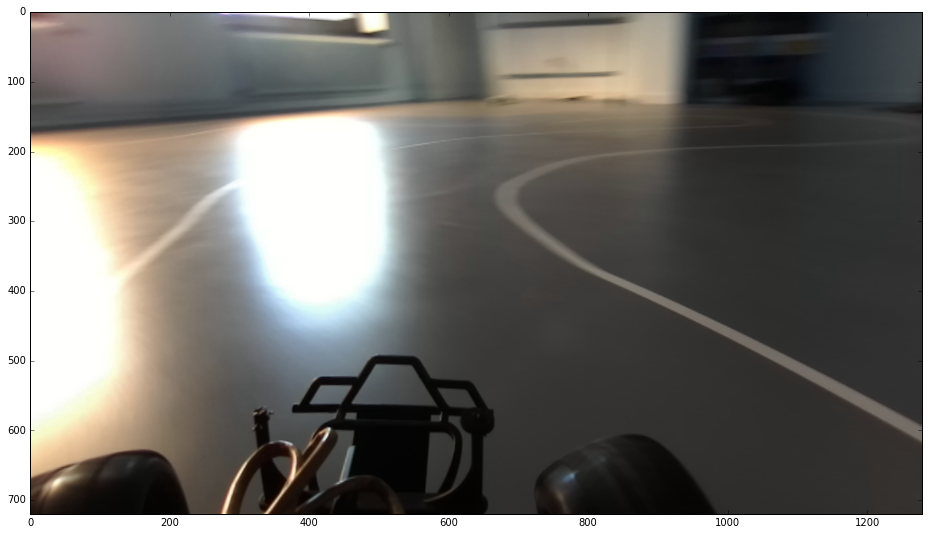

In [41]:
img = cv2.imread('camera_sample.png')
img_w, img_h = img.shape[1], img.shape[0]
plt.figure(figsize=(9 * 1.777, 9))
_ = plt.imshow(img)

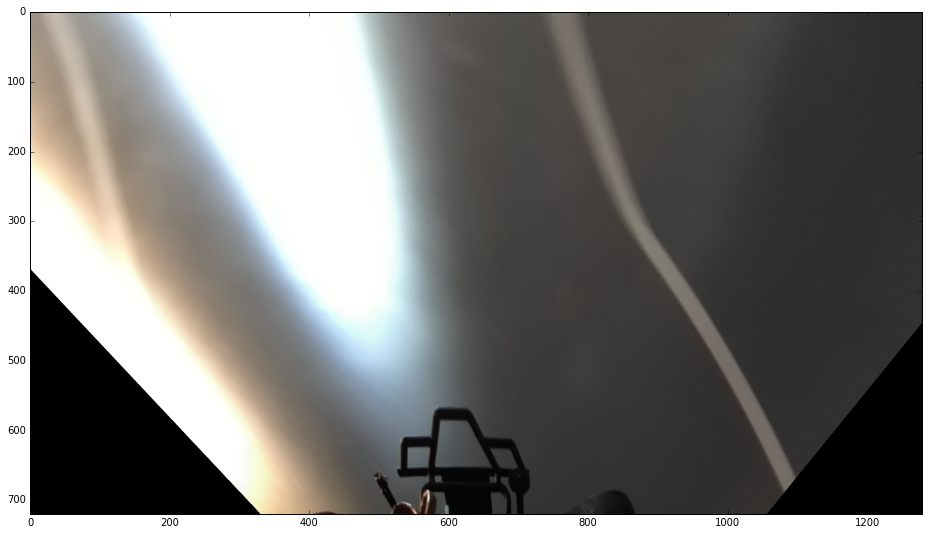

In [42]:
plt.figure(figsize=(9*1.777, 9))
bev_image = cv2.warpPerspective(img, t, (img_w, img_h))
_ = plt.imshow(bev_image)

In [43]:
image_grey = cv2.cvtColor(bev_image, cv2.COLOR_RGB2GRAY)

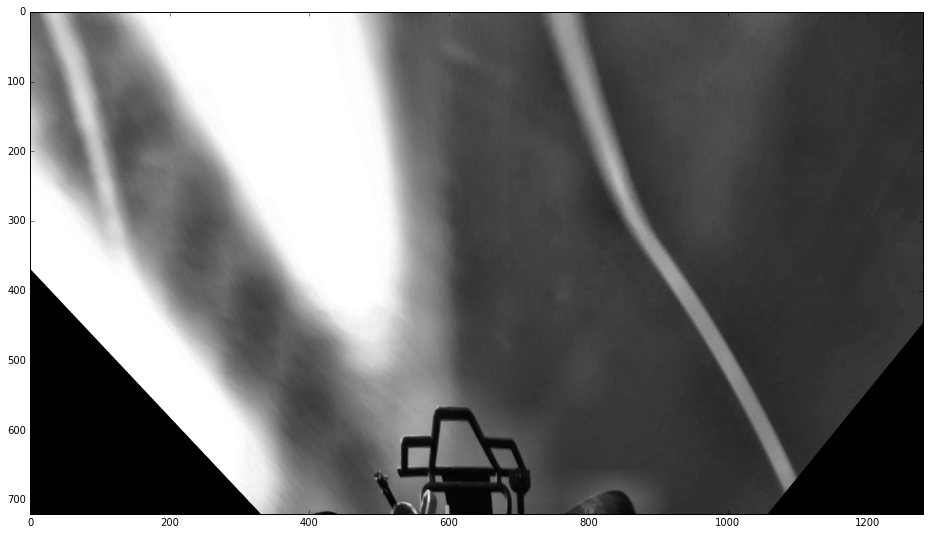

In [44]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
norm_image_cl = clahe.apply(image_grey)

plt.figure(figsize=(18, 9))
_ = plt.imshow(norm_image_cl, cmap='gray')

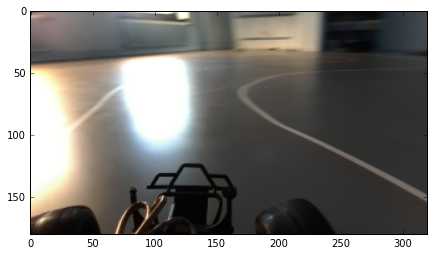

In [45]:
factor = 4
img_small_w, img_small_h = img_w/factor, img_h/factor
img_small = cv2.resize(img, (img_w/factor, img_h/factor))
plt.figure(figsize=(4 * 1.777, 4))
_ = plt.imshow(img_small)

In [46]:
t_small = cv2.getPerspectiveTransform(img_points/factor, obj_points/factor)

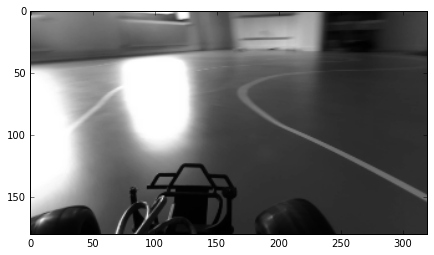

In [47]:
plt.figure(figsize=(4 * 1.777, 4))
image_small_grey = cv2.cvtColor(img_small, cv2.COLOR_RGB2GRAY)
image_small_grey = image_small_grey[:, :, np.newaxis]
_ = plt.imshow(image_small_grey[:, :, 0], cmap='gray')

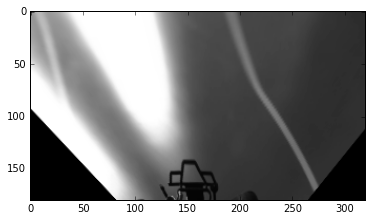

In [48]:
image_small_bev = cv2.warpPerspective(image_small_grey, t_small, (img_small_w, img_small_h))
image_small_bev = image_small_bev[:, :, np.newaxis]
_ = plt.imshow(image_small_bev[:, :, 0], cmap='gray')

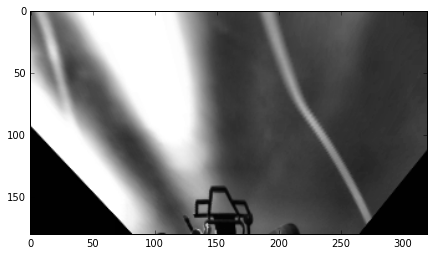

In [49]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
norm_image_small_cl = clahe.apply(image_small_bev)
norm_image_small_cl = norm_image_small_cl[:, :, np.newaxis]
plt.figure(figsize=(4 * 1.777, 4))
_ = plt.imshow(norm_image_small_cl[:,:,0], cmap='gray')

In [50]:
t_small

array([[ -3.39188850e+00,  -7.85469834e+00,   7.49387630e+02],
       [  1.07479546e-01,  -1.23717880e+01,   8.88834020e+02],
       [  3.75027090e-05,  -4.36753651e-02,   1.00000000e+00]])

In [51]:
np.savetxt('perspective_transform.txt', t_small)